# Libraries

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix


# Data With 12 Beef Cuts 

In [19]:
insideOutside = pd.read_excel(r'e-nose_dataset_12_beef_cuts.xlsx', sheet_name=0)
roundData = pd.read_excel(r'e-nose_dataset_12_beef_cuts.xlsx', sheet_name=1)
topSirloin = pd.read_excel(r'e-nose_dataset_12_beef_cuts.xlsx', sheet_name=2)
tenderloin = pd.read_excel(r'e-nose_dataset_12_beef_cuts.xlsx', sheet_name=3)
flapMeat = pd.read_excel(r'e-nose_dataset_12_beef_cuts.xlsx', sheet_name=4)
striploin = pd.read_excel(r'e-nose_dataset_12_beef_cuts.xlsx', sheet_name=5)
ribEye = pd.read_excel(r'e-nose_dataset_12_beef_cuts.xlsx', sheet_name=6)
skirtMeat = pd.read_excel(r'e-nose_dataset_12_beef_cuts.xlsx', sheet_name=7)
brisket = pd.read_excel(r'e-nose_dataset_12_beef_cuts.xlsx', sheet_name=8)
clodChuck = pd.read_excel(r'e-nose_dataset_12_beef_cuts.xlsx', sheet_name=9)
shin = pd.read_excel(r'e-nose_dataset_12_beef_cuts.xlsx', sheet_name=10)
fat = pd.read_excel(r'e-nose_dataset_12_beef_cuts.xlsx', sheet_name=11)

dfs = [insideOutside, roundData, topSirloin, tenderloin, flapMeat, striploin, ribEye, skirtMeat, brisket, clodChuck, shin, fat]

for df in dfs:
    df.drop(['Minute', 'TVC'], axis=1, inplace=True)

In [20]:
beefData = pd.concat(dfs, ignore_index=True)

# Distribution of Labels

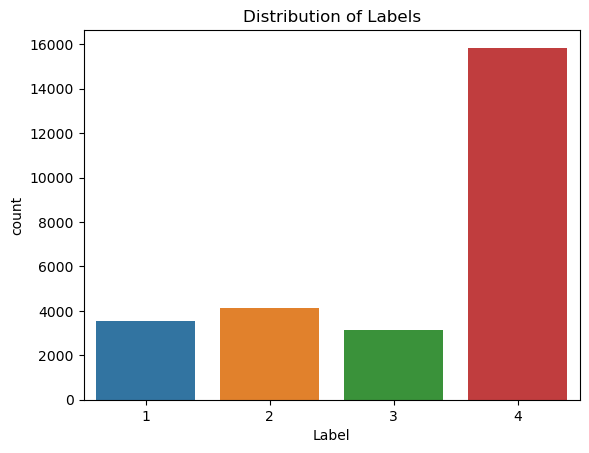

In [21]:
sns.countplot(x='Label', data=beefData)
plt.title('Distribution of Labels')
plt.show()

# Correlation Matrix

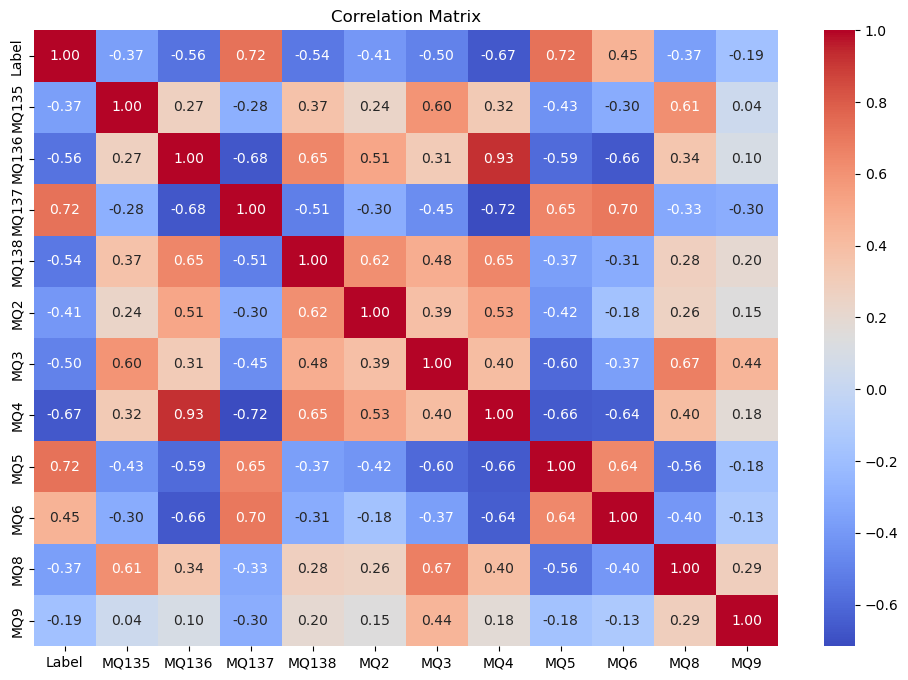

In [22]:
correlationMatrix = beefData.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Boxplot Of Features

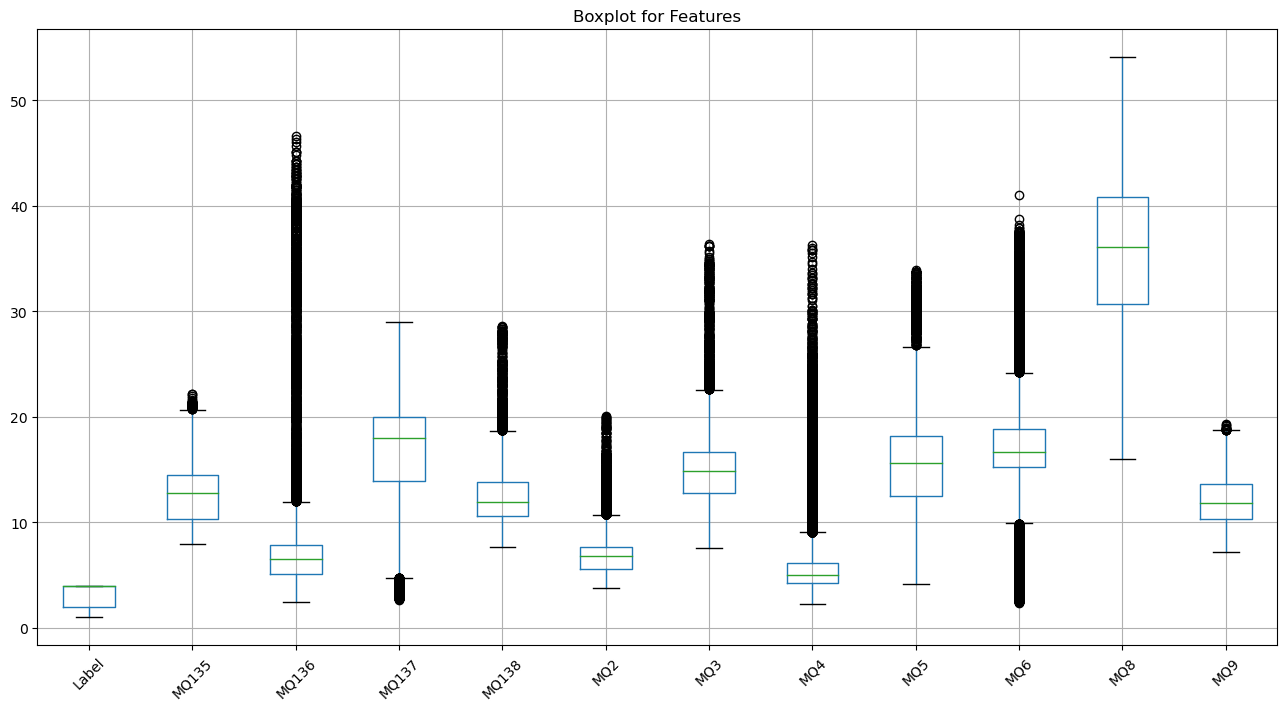

In [23]:
plt.figure(figsize=(16, 8))
beefData.boxplot(rot=45)
plt.title('Boxplot for Features')
plt.show()

# Data Preparation

In [24]:
X = beefData.drop('Label', axis=1)
y = beefData['Label']

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection using ANOVA

In [25]:
kBest = SelectKBest(score_func=f_classif, k=10)
XTrainBest = kBest.fit_transform(XTrain, yTrain)

selectedFeaturesIndices = kBest.get_support(indices=True)
selectedFeatures = X.columns[selectedFeaturesIndices]
print("Selected Features:", selectedFeatures)



Selected Features: Index(['MQ135', 'MQ136', 'MQ137', 'MQ138', 'MQ2', 'MQ3', 'MQ4', 'MQ5', 'MQ6',
       'MQ8'],
      dtype='object')


# Visualize Feature Scores

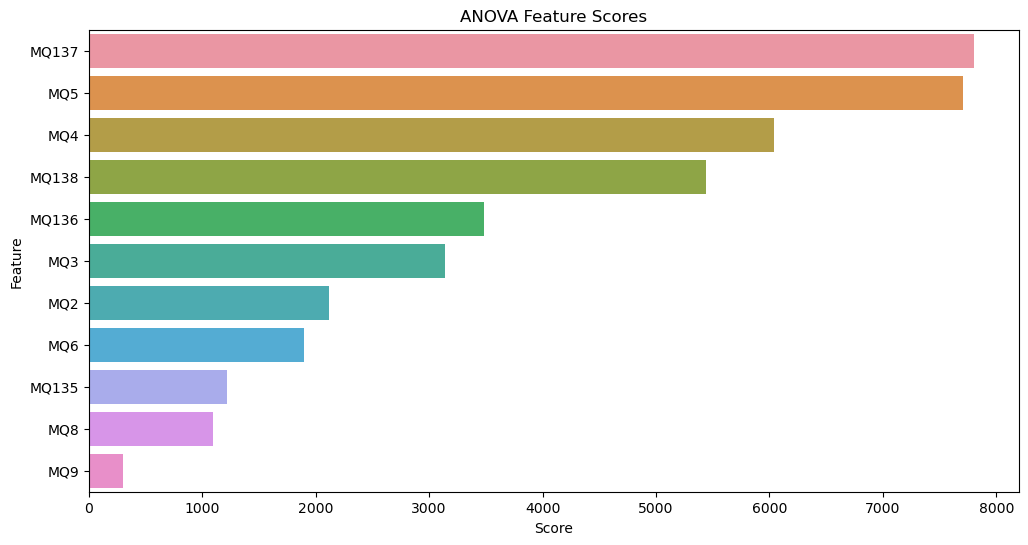

In [26]:
featureScores = pd.DataFrame({'Feature': X.columns, 'Score': kBest.scores_})
featureScores = featureScores.sort_values(by='Score', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Score', y='Feature', data=featureScores)
plt.title('ANOVA Feature Scores')
plt.show()


# ANN 1st Approach

#### Data Scaling

In [27]:
scaler = StandardScaler()
XTrainScaled = scaler.fit_transform(XTrain)
XTestScaled = scaler.transform(XTest)

#### Resampling for Imbalanced Classification

In [28]:
smote = SMOTE(random_state=42)
XTrainResampled, yTrainResampled = smote.fit_resample(XTrainScaled, yTrain)

#### Neural Network Model Definition

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu', input_dim=XTrain.shape[1]),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='softmax')
])

#### Model Training

In [60]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(XTrainResampled, yTrainResampled, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


C:\Users\HEHEBOI\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


1264/1264 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3125 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
1264/1264 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3125 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/10
1264/1264 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3125 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/10
1264/1264 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3125 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/10
1264/1264 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3125 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/10
1264/1264 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3125 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/10
1264/1264 [==============================] - 2s 2ms/step - loss:

#### Model Evaluation

In [34]:
import numpy as np

In [64]:
anntrainpredictions=model.predict(XTrainResampled)
print("Training accuracy is:",accuracy_score(yTrainResampled,anntrainpredictions) *100)

anntestpredictions=model.predict(XTestScaled)
print("Training accuracy is:",accuracy_score(yTest,anntestpredictions) *100)

1580/1580 [==============================] - 2s 1ms/step
Training accuracy is: 25.0
167/167 [==============================] - 0s 1ms/step
Training accuracy is: 13.081831831831831


Test Accuracy: 0.1308183183183183
Train Accuracy: 0.25
Confusion Matrix:
[[ 697    0    0    0]
 [ 835    0    0    0]
 [ 593    0    0    0]
 [3203    0    0    0]]
Classification Report:
              precision    recall  f1-score   support

           1       0.13      1.00      0.23       697
           2       0.00      0.00      0.00       835
           3       0.00      0.00      0.00       593
           4       0.00      0.00      0.00      3203

    accuracy                           0.13      5328
   macro avg       0.03      0.25      0.06      5328
weighted avg       0.02      0.13      0.03      5328



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


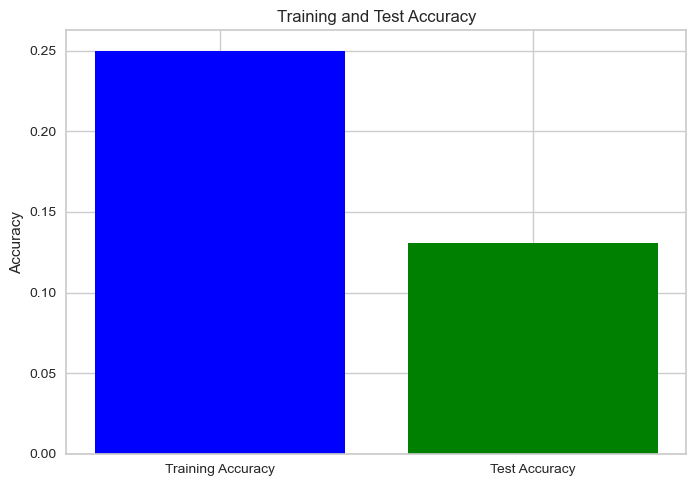

In [66]:


accuracy = accuracy_score(yTest,anntestpredictions)

train_acc = accuracy_score(yTrainResampled,anntrainpredictions)

confMatrix = confusion_matrix(yTest, anntestpredictions)
classificationRep = classification_report(yTest, anntestpredictions)

print(f'Test Accuracy: {accuracy}')
print(f'Train Accuracy: {train_acc}')

print(f'Confusion Matrix:\n{confMatrix}')
print(f'Classification Report:\n{classificationRep}')

labels = ['Training Accuracy', 'Test Accuracy']
accuracies = [train_acc, accuracy]

plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.show()


# KNN 2nd Approach

#### Using elbow method to first determine K 

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

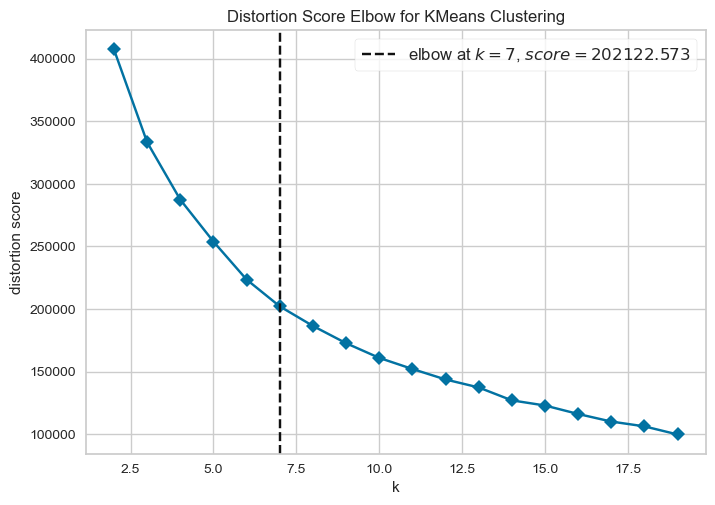

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2, 20), timings=False)
visualizer.fit(XTrainResampled)
visualizer.show()


#### KNN Model Training

In [40]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(XTrainResampled, yTrainResampled)

KNeighborsClassifier(n_neighbors=7)

#### Model Evaluation

Training Accuracy: 0.995331170372715
Testing Accuracy: 0.9819819819819819
Confusion Matrix:
[[ 688    9    0    0]
 [   4  820   11    0]
 [   0   14  576    3]
 [   0    0   55 3148]]
Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       697
           2       0.97      0.98      0.98       835
           3       0.90      0.97      0.93       593
           4       1.00      0.98      0.99      3203

    accuracy                           0.98      5328
   macro avg       0.97      0.98      0.97      5328
weighted avg       0.98      0.98      0.98      5328



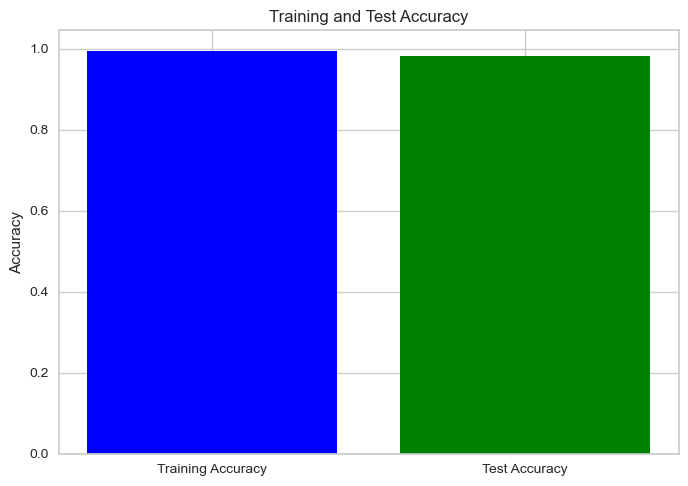

In [54]:

train_pred = knn.predict(XTrainResampled)
train_accuracy = accuracy_score(yTrainResampled, train_pred)

yPredKnn = knn.predict(XTestScaled)
test_accuracy = accuracy_score(yTest, yPredKnn)

confMatrix = confusion_matrix(yTest, yPredKnn)
classificationRep = classification_report(yTest, yPredKnn)

print(f'Training Accuracy: {train_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')
print(f'Confusion Matrix:\n{confMatrix}')
print(f'Classification Report:\n{classificationRep}')

labels = ['Training Accuracy', 'Test Accuracy']
accuracies = [train_accuracy, test_accuracy]

plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.show()

# SVM 3rd Approach

#### Model Training

In [44]:
svmModel = SVC(kernel='linear', random_state=42)
svmModel.fit(XTrainScaled, yTrain)

SVC(kernel='linear', random_state=42)

#### Model Evaluation

Training SVM Accuracy: 0.7911490068845454
Testing SVM Accuracy: 0.8787537537537538
SVM Confusion Matrix:
[[ 643   54    0    0]
 [  97  627  104    7]
 [   0  104  290  199]
 [   0   13   68 3122]]
SVM Classification Report:
              precision    recall  f1-score   support

           1       0.87      0.92      0.89       697
           2       0.79      0.75      0.77       835
           3       0.63      0.49      0.55       593
           4       0.94      0.97      0.96      3203

    accuracy                           0.88      5328
   macro avg       0.81      0.78      0.79      5328
weighted avg       0.87      0.88      0.87      5328



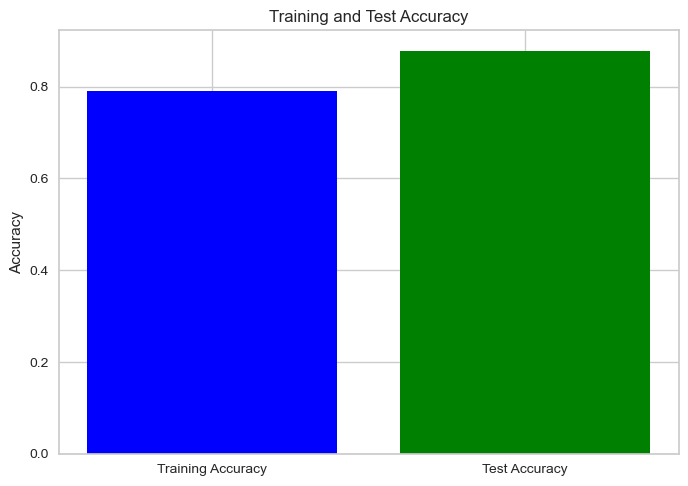

In [55]:
train_pred_svm = svmModel.predict(XTrainResampled)
train_accuracy_svm = accuracy_score(yTrainResampled, train_pred_svm)

yPredSvm = svmModel.predict(XTestScaled)
test_accuracy_svm = accuracy_score(yTest, yPredSvm)

confMatrixSvm = confusion_matrix(yTest, yPredSvm)
classificationRepSvm = classification_report(yTest, yPredSvm)

print(f'Training SVM Accuracy: {train_accuracy_svm}')
print(f'Testing SVM Accuracy: {test_accuracy_svm}')
print(f'SVM Confusion Matrix:\n{confMatrixSvm}')
print(f'SVM Classification Report:\n{classificationRepSvm}')

labels = ['Training Accuracy', 'Test Accuracy']
accuracies = [train_accuracy_svm, test_accuracy_svm]

plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.show()

# Logistic Regression 4th Approach

#### Model Training

In [47]:
logreg = LogisticRegression()
logreg.fit(XTrainResampled, yTrainResampled)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Model Evaluation

Training LR Accuracy: 0.7956002215715755
Testing LR Accuracy: 0.8290165165165165
LR Confusion Matrix:
[[ 643   54    0    0]
 [  99  564  165    7]
 [   0   88  403  102]
 [   0   56  340 2807]]
LR Classification Report:
              precision    recall  f1-score   support

           1       0.87      0.92      0.89       697
           2       0.74      0.68      0.71       835
           3       0.44      0.68      0.54       593
           4       0.96      0.88      0.92      3203

    accuracy                           0.83      5328
   macro avg       0.75      0.79      0.76      5328
weighted avg       0.86      0.83      0.84      5328



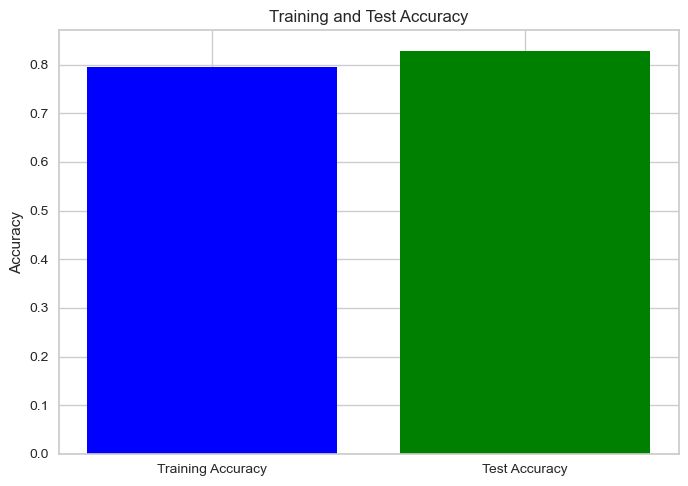

In [56]:
train_pred_lr = logreg.predict(XTrainResampled)
train_accuracy_lr = accuracy_score(yTrainResampled, train_pred_lr)

yPredLr = logreg.predict(XTestScaled)
test_accuracy_lr = accuracy_score(yTest, yPredLr)

confMatrixLr = confusion_matrix(yTest, yPredLr)
classificationRepLr = classification_report(yTest, yPredLr)

print(f'Training LR Accuracy: {train_accuracy_lr}')
print(f'Testing LR Accuracy: {test_accuracy_lr}')
print(f'LR Confusion Matrix:\n{confMatrixLr}')
print(f'LR Classification Report:\n{classificationRepLr}')

labels = ['Training Accuracy', 'Test Accuracy']
accuracies = [train_accuracy_lr, test_accuracy_lr]

plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.show()

# Confusion Matrix of All Approaches

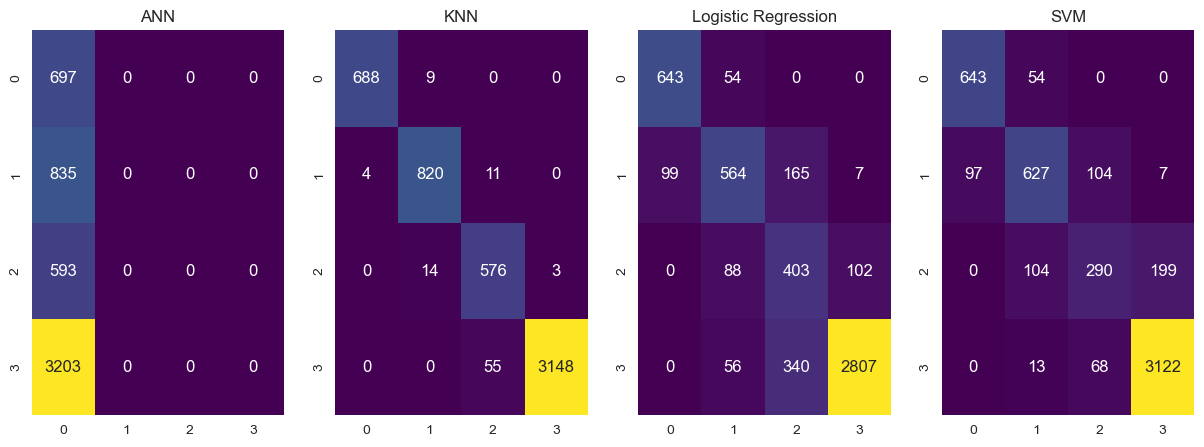

In [57]:
confMatrixAnn = confusion_matrix(yTest, yPredAnn)
confMatrixKnn = confusion_matrix(yTest, yPredKnn)
confMatrixLr = confusion_matrix(yTest, yPredLr)
confMatrixSvm = confusion_matrix(yTest, yPredSvm)

fig, axes = plt.subplots(1, 4, figsize=(15, 5))

cmap = sns.color_palette("viridis", as_cmap=True)

sns.heatmap(confMatrixAnn, annot=True, fmt='d', cmap=cmap, ax=axes[0], cbar=False)
axes[0].set_title('ANN')

sns.heatmap(confMatrixKnn, annot=True, fmt='d', cmap=cmap, ax=axes[1], cbar=False)
axes[1].set_title('KNN')

sns.heatmap(confMatrixLr, annot=True, fmt='d', cmap=cmap, ax=axes[2], cbar=False)
axes[2].set_title('Logistic Regression')

sns.heatmap(confMatrixSvm, annot=True, fmt='d', cmap=cmap, ax=axes[3], cbar=False)
axes[3].set_title('SVM')

plt.show()

# Evaluation Metrics of All Approaches

In [58]:

accuracyKnn = accuracy_score(yTest, yPredKnn)
accuracyAnn = accuracy_score(yTest, yPredAnn)
accuracyLr = accuracy_score(yTest, yPredLr)
accuracySvm = accuracy_score(yTest, yPredSvm)

f1Knn = f1_score(yTest, yPredKnn, average='weighted')
f1Ann = f1_score(yTest, yPredAnn, average='weighted')
f1Lr = f1_score(yTest, yPredLr, average='weighted')
f1Svm = f1_score(yTest, yPredSvm, average='weighted')

precisionKnn = precision_score(yTest, yPredKnn, average='weighted')
precisionAnn = precision_score(yTest, yPredAnn, average='weighted')
precisionLr = precision_score(yTest, yPredLr, average='weighted')
precisionSvm = precision_score(yTest, yPredSvm, average='weighted')

recallKnn = recall_score(yTest, yPredKnn, average='weighted')
recallAnn = recall_score(yTest, yPredAnn, average='weighted')
recallLr = recall_score(yTest, yPredLr, average='weighted')
recallSvm = recall_score(yTest, yPredSvm, average='weighted')

confMatrixKnn = confusion_matrix(yTest, yPredKnn)
confMatrixAnn = confusion_matrix(yTest, yPredAnn)
confMatrixLr = confusion_matrix(yTest, yPredLr)
confMatrixSvm = confusion_matrix(yTest, yPredSvm)

tpKnn, fnKnn, fpKnn, tnKnn = np.diag(confMatrixKnn)
tpAnn, fnAnn, fpAnn, tnAnn = np.diag(confMatrixAnn)
tpLr, fnLr, fpLr, tnLr = np.diag(confMatrixLr)
tpSvm, fnSvm, fpSvm, tnSvm = np.diag(confMatrixSvm)

specificityKnn = tnKnn / (fpKnn + tnKnn)
specificityAnn = tnAnn / (fpAnn + tnAnn)
specificityLr = tnLr / (fpLr + tnLr)
specificitySvm = tnSvm / (fpSvm + tnSvm)


metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Specificity']
modelNames = ['KNN', 'ANN', 'Logistic Regression', 'SVM']

values = [
    [accuracyKnn, f1Knn, precisionKnn, recallKnn, specificityKnn],
    [accuracyAnn, f1Ann, precisionAnn, recallAnn, specificityAnn],
    [accuracyLr, f1Lr, precisionLr, recallLr, specificityLr],
    [accuracySvm, f1Svm, precisionSvm, recallSvm, specificitySvm]
]

metricsDf = pd.DataFrame(values, columns=metrics, index=modelNames)

print(metricsDf)


                     Accuracy  F1 Score  Precision    Recall  Specificity
KNN                  0.981982  0.982259   0.982954  0.981982     0.845328
ANN                  0.130818  0.030267   0.017113  0.130818          NaN
Logistic Regression  0.829017  0.838918   0.857451  0.829017     0.874455
SVM                  0.878754  0.873352   0.870622  0.878754     0.915006


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HEHEBOI\AppData\Local\Temp\ipykernel_13300\2798225319.py:32: RuntimeWarning: invalid value encountered in scalar divide
  specificityAnn = tnAnn / (fpAnn + tnAnn)


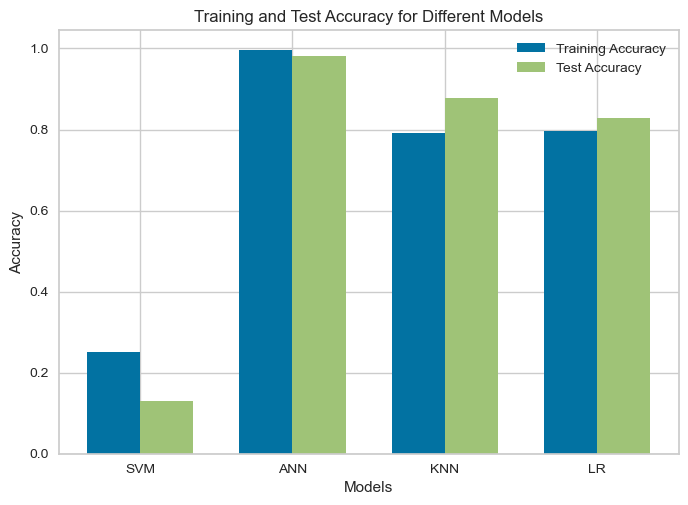

In [59]:
test_accuracies=[accuracy,test_accuracy,test_accuracy_svm,test_accuracy_lr]
train_accuracies=[train_acc,train_accuracy,train_accuracy_svm,train_accuracy_lr]
model_names = ['SVM', 'ANN', 'KNN', 'LR']

bar_width = 0.35
index = np.arange(len(model_names))

plt.bar(index, train_accuracies, bar_width, label='Training Accuracy')
plt.bar(index + bar_width, test_accuracies, bar_width, label='Test Accuracy')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy for Different Models')
plt.xticks(index + bar_width / 2, model_names)
plt.legend()
plt.show()